In [1]:
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt

In [2]:
leaf = pd.read_csv("leaf_data_uci_updated.csv")

In [3]:
leaf.head()

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
0,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000023,0.34214


In [4]:
leaf.shape

(340, 14)

In [5]:
leaf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Eccentricity               340 non-null    float64
 1   Aspect Ratio               340 non-null    float64
 2   Elongation                 340 non-null    float64
 3   Solidity                   340 non-null    float64
 4   Stochastic Convexity       340 non-null    float64
 5   Isoperimetric Factor       340 non-null    float64
 6   Maximal Indentation Depth  340 non-null    float64
 7   Lobedness                  340 non-null    float64
 8   Average Intensity          340 non-null    float64
 9    Average Contrast          340 non-null    float64
 10  Smoothness                 340 non-null    float64
 11   Third moment              340 non-null    float64
 12  Uniformity                 340 non-null    float64
 13  Entropy                    340 non-null    float64

In [6]:
leaf.describe().T

,count,mean,std,min,25%,50%,75%,max
Eccentricity,340.0,0.719854,0.208311,0.117080,0.550623,0.763450,0.895097,0.998710
Aspect Ratio,340.0,1.902051,0.888783,1.006600,1.211300,1.570750,2.343100,4.040800
Elongation,340.0,0.513760,0.195583,0.107610,0.349623,0.501855,0.633373,0.948340
Solidity,340.0,0.919101,0.075247,0.761323,0.890667,0.948130,0.976897,0.993880
Stochastic Convexity,340.0,0.975867,0.032506,0.915575,0.966230,0.992980,1.000000,1.000000
Isoperimetric Factor,340.0,0.531234,0.217532,0.078376,0.346818,0.579160,0.700713,0.858160
Maximal Indentation Depth,340.0,0.034647,0.031502,0.002837,0.009521,0.023860,0.047834,0.105303
Lobedness,340.0,0.284499,0.365318,0.001464,0.016500,0.103615,0.416432,1.016331
Average Intensity,340.0,0.051209,0.035518,0.005022,0.022843,0.042087,0.073046,0.148349
Average Contrast,340.0,0.124535,0.051860,0.033415,0.083362,0.119375,0.163795,0.280810


In [8]:
leaf.duplicated().sum()

0

In [9]:
#Scaling
from scipy.stats import zscore
leafs=leaf.apply(zscore)
leafs.head(10)

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
0,0.034066,-0.482099,-0.971865,0.881718,0.743486,1.402718,-0.953401,-0.769100,-0.096417,0.065951,-0.105019,-0.099339,-0.241076,0.022209
1,0.105170,-0.424069,-0.781384,0.830744,0.689571,1.231226,-0.934782,-0.766208,-0.762703,-0.657718,-0.711617,-0.661808,-0.836779,-0.798023
2,0.227715,-0.371335,-0.633812,0.777907,0.743486,1.274732,-0.864365,-0.752173,-1.108478,-1.295588,-1.078407,-1.060062,-0.946702,-1.231436
3,0.087093,-0.498437,-0.819275,0.752752,0.743486,1.315476,-0.882820,-0.756324,-0.994197,-1.140210,-1.003871,-1.007984,-0.862100,-0.984224
4,0.495931,-0.148005,-0.354030,0.770320,0.743486,1.029856,-0.865297,-0.752390,-1.220111,-1.529370,-1.172391,-1.140460,-0.989599,-1.404965
5,0.048633,-0.465197,-0.875190,0.910999,0.743486,1.443692,-0.944230,-0.767718,-1.148235,-1.274674,-1.068938,-1.014579,-0.985727,-1.407465
6,0.484489,-0.168062,-0.354235,0.805723,0.635348,1.088646,-0.912986,-0.762387,-0.925820,-0.848687,-0.838213,-0.759114,-0.935978,-1.067804
7,0.288291,-0.316122,-0.622342,0.878657,0.689571,1.274917,-0.939347,-0.766948,-0.742542,-0.672974,-0.722255,-0.715642,-0.622413,-0.843982
8,0.533815,-0.092567,-0.290998,0.842456,0.743486,1.104115,-0.910519,-0.761924,-1.239657,-1.620577,-1.203106,-1.178728,-0.961597,-1.413835
9,0.896403,0.550494,0.356382,0.768324,0.689571,0.612106,-0.834336,-0.744698,-1.246286,-1.587149,-1.192232,-1.162959,-0.975300,-1.509966


In [10]:
# Creating Clusters using KMeans
# Forming 2 Clusters with K=2

In [11]:
# Create K Means cluster and store the result in the object k_means

k_means = KMeans(n_clusters = 2)

In [12]:
# Fit K means on the scaled_df
k_means.fit(leafs)

KMeans(n_clusters=2)

In [13]:
# Cluster Output for all the observations

In [14]:
# Get the labels
k_means.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [15]:
# Within Cluster Sum of Squares

In [16]:
k_means.inertia_

3412.257118426089

In [17]:
# Forming clusters with K = 1,3,4,5,6 and comparing the WSS

In [18]:
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(leafs)
k_means.inertia_

4759.999999999998

In [19]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(leafs)
k_means.inertia_

2389.284762244628

In [20]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(leafs)
k_means.inertia_

1895.5346689676155

In [21]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(leafs)
k_means.inertia_

1672.4884939305718

In [22]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(leafs)
k_means.inertia_

1444.588242104043

In [24]:
# WSS reduces as K keeps increasing
# Calculating WSS for other values of K - Elbow Method

In [25]:
wss =[]

In [26]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(leafs)
    wss.append(KM.inertia_)

In [27]:
wss

[4759.999999999998,
 3412.257118426089,
 2389.284762244628,
 1895.5346689676155,
 1672.4884939305718,
 1444.588242104043,
 1257.5854552886253,
 1135.0669760285068,
 1033.4497551369154,
 955.7857112708228]

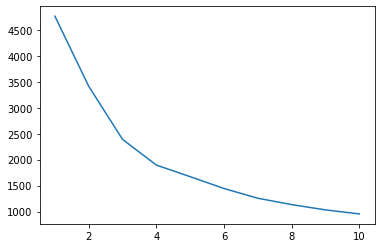

In [28]:
plt.plot(range(1,11), wss)

In [29]:
# KMeans with K=3

In [30]:
k_means = KMeans(n_clusters = 3)
k_means.fit(leafs)
labels = k_means.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 2,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [31]:
# Cluster evaluation for 3 clusters: the silhouette score

In [32]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [33]:
# Calculating silhouette_score
silhouette_score(leafs,labels)

0.3176316570376883

In [ ]:
# KMeans with K=4

In [34]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(leafs)
labels = k_means.labels_

In [35]:
# Cluster evaluation for 4 clusters

In [36]:
silhouette_score(leafs,labels)

0.3442812126829124

In [37]:
# silhouette score is better for 4 clusters than for 3 clusters. So, final clusters will be 4

# Appending Clusters to the original dataset

In [38]:
leaf["Clus_kmeans4"] = labels
leaf.head()

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy,Clus_kmeans4
0,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560,3
1,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659,3
2,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348,3
3,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785,3
4,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000023,0.34214,3


In [39]:
# Cluster Profiling

In [40]:
leaf.Clus_kmeans4.value_counts().sort_index()

0     42
1    104
2     62
3    132
Name: Clus_kmeans4, dtype: int64

In [42]:
clust_profile=leaf
clust_profile=clust_profile.groupby('Clus_kmeans4').mean()
clust_profile['freq']=leaf.Clus_kmeans4.value_counts().sort_index()
clust_profile

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy,freq
Clus_kmeans4,,,,,,,,,,,,,,,
0,0.980501,3.811907,0.847141,0.902887,0.967299,0.249694,0.044316,0.365468,0.024524,0.085889,0.007985,0.002616,0.000121,0.700134,42
1,0.712605,1.789759,0.448295,0.946234,0.990552,0.601794,0.025582,0.169076,0.090665,0.181893,0.032273,0.010386,0.000681,1.727866,104
2,0.550938,1.288179,0.628680,0.790829,0.917064,0.255971,0.085634,0.901656,0.048421,0.120954,0.016298,0.005436,0.000286,1.184722,62
3,0.721973,1.671175,0.405286,0.963132,0.994644,0.694511,0.014763,0.059799,0.029924,0.093322,0.009430,0.003057,0.000207,0.854074,132


In [ ]:
# Cluster 0: Roughest leaf
# Cluster 1: Smoothest leaf
# Cluster 2: Medium smooth leaf
# Cluster 3: Medium rough  leaf
# Recommendations

In [43]:
leaf.to_csv('leaf_km1.csv')

In [51]:
lt= np.random.seed(7)

<IPython.core.display.Javascript object>

In [55]:
print(np.random.seed(7))

<IPython.core.display.Javascript object>

None


In [56]:
array=np.array(np.random.rand(20)).reshape(10,2)
print(array)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[[0.07630829 0.77991879]
 [0.43840923 0.72346518]
 [0.97798951 0.53849587]
 [0.50112046 0.07205113]
 [0.26843898 0.4998825 ]
 [0.67923    0.80373904]
 [0.38094113 0.06593635]
 [0.2881456  0.90959353]
 [0.21338535 0.45212396]
 [0.93120602 0.02489923]]


In [58]:
# for n_clusters=2
from sklearn.cluster import KMeans
kmeans=KMeans(random_state=0,n_clusters=2)
KM.fit(array)

KMeans(n_clusters=10, random_state=1)

In [61]:
k_means = KMeans(n_clusters = 2)
k_means.fit(array)
labels = k_means.labels_
labels

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1])

In [62]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(array)
k_means.inertia_

0.8293456925100041

In [63]:
silhouette_score(array,labels)

0.4163799287991604